**Mean shift clustering :** now we want to implement mean shift clustering .


(60000, 28, 28)
(60000,)


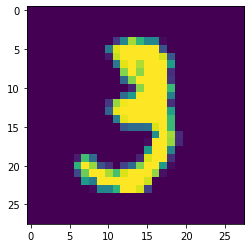

(60000, 784)
(784,)


'0.22.2.post1'

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from tqdm import tqdm
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
plt.imshow(x_train[10])
plt.show()
y_train[10]
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
sklearn.__version__

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X, n_samples=10000)
#print(bandwidth)


In [ ]:
meanshift = MeanShift(bandwidth=8)
meanshift.fit(X[:5000,])

labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 20


with the bandwidth of 8 we get 20 clusters which has overlapping but if we choose 9.5 we will get 1 cluster , so the optimal value of bandwidth is somewhere between 8 and 9. But we will fit our data into meanshift algorithm with the bandwith of 8.

In [ ]:
meanshift = MeanShift(bandwidth=8)
meanshift.fit(X[:10000,])

labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 21


So we get 21 clusters with bandwidth of 8 in 10k data and it took about 41 min to run this algorithm!!!
although it has overlapping and we only needed 10 clusters but we can merge similar clusters.


Now lets label them properly :

In [ ]:
def infer_cluster_labels(n_clusters,labels_, actual_labels):
  inferred_labels = {}

  for i in range(n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(labels_ == i)
    #print("index is : " + str(index))
    # append actual labels for each point in cluster
    labels.append(actual_labels[index])
    #print("actual label  is : " + str(actual_labels[index]))
    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    print(labels)
    print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels



[array([5], dtype=uint8)]
Cluster: 0, label: 5
[array([0], dtype=uint8)]
Cluster: 1, label: 0
[array([4], dtype=uint8)]
Cluster: 2, label: 4
[array([1], dtype=uint8)]
Cluster: 3, label: 1
[array([9], dtype=uint8)]
Cluster: 4, label: 9
[array([2], dtype=uint8)]
Cluster: 5, label: 2
[array([1], dtype=uint8)]
Cluster: 6, label: 1
[array([3], dtype=uint8)]
Cluster: 7, label: 3
[array([1], dtype=uint8)]
Cluster: 8, label: 1
[array([4], dtype=uint8)]
Cluster: 9, label: 4
[array([3], dtype=uint8)]
Cluster: 10, label: 3
[array([5], dtype=uint8)]
Cluster: 11, label: 5
[array([3], dtype=uint8)]
Cluster: 12, label: 3
[array([6], dtype=uint8)]
Cluster: 13, label: 6
[array([1], dtype=uint8)]
Cluster: 14, label: 1
[array([7], dtype=uint8)]
Cluster: 15, label: 7
[array([2], dtype=uint8)]
Cluster: 16, label: 2
[array([8], dtype=uint8)]
Cluster: 17, label: 8
[array([6], dtype=uint8)]
Cluster: 18, label: 6
[array([9], dtype=uint8)]
Cluster: 19, label: 9
[array([4], dtype=uint8)]
Cluster: 20, label: 4
[5

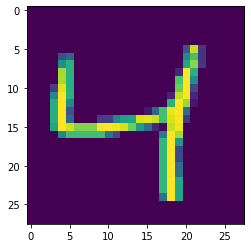

In [ ]:
def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
            
  return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(n_clusters_,labels_unique, Y)
X_clusters = meanshift.predict(X[:10000,])
#X_clusters says that each ndarray belong to which cluster but the index is not as same as label of our mnist(digits)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:10])
print (Y[:10])
plt.imshow(X[2].reshape(28,28))
plt.show()

Now lets measure its accuracy :

In [ ]:
# purity measure function
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# rand index measurement function
from sklearn.metrics.cluster import adjusted_rand_score
def rand_index_score(y_true,y_pred):
  return adjusted_rand_score(y_true,y_pred)

In [ ]:
print(" rand index score of meanshift algorithm with bandwidth parameter of 8 is :" +str(rand_index_score(Y[:10000,],predicted_labels)) )
print("purity  of meanshift algorithm with bandwidth parameter of 8  is :" +str(purity_score(Y[:10000,],predicted_labels)) )

 rand index score of meanshift algorithm with bandwidth parameter of 8 is :0.0019033455645360666
purity  of meanshift algorithm with bandwidth parameter of 8  is :0.1408
